PART I

Code up a gradient descent algorithm using *your* expressions and confirm it works.

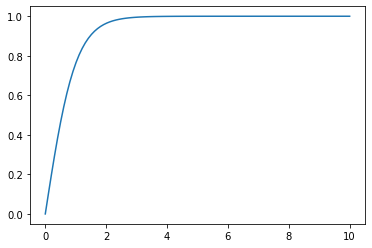

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
import math
%matplotlib inline
#plot tanh(x)
a=np.linspace(0,10,100)
plt.plot(a,np.tanh(a))

GD function

In [ ]:
def backprop(x,t,depth,rate,steps):
  parameters={}
  parameters["w1"]=np.random.randn(depth,len(x[0]))
  parameters["b1"]=np.zeros(depth)
  parameters["w"]=np.random.randn(depth)
  parameters["b"]=0
  for i in range(steps):
    z1=np.dot(x, parameters['w1'].T)  + parameters['b1']
    h=np.tanh(z1)
    z=np.dot(h, parameters['w'].T) + parameters['b']
    y=sigmoid(z)
    loss=(1/len(x)) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
    L_bar = 1
    z_bar = (1/len(x)) * (y - t)
    w_bar = np.dot(h.T, z_bar)
    b_bar = np.dot(z_bar, np.ones(len(x)))
    h_bar = np.outer(z_bar, parameters['w'].T)
    z1_bar = h_bar * (1 - np.tanh(z1)**2)
    w1_bar = np.dot(z1_bar.T, x)
    b1_bar = np.dot(z1_bar.T, np.ones(len(x)))
    parameters["w1"]-=rate*w1_bar
    parameters["b1"]-=rate*b1_bar
    parameters["w"]-=rate*w_bar
    parameters["b"]-=rate*b_bar
    if i % 10 == 0:
      print("Step {:3d} | Loss {:3.2f}".format(i, loss))
  return parameters,loss


generate datasets

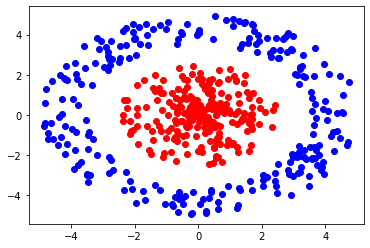

In [ ]:
#generate datasets
np.random.seed(0)
def make_dataset(num_points):
    radius = 5
    data = []
    labels = []
    # Generate positive examples (labeled 1).
    for i in range(num_points // 2):
        r = np.random.uniform(0, radius*0.5)
        angle = np.random.uniform(0, 2*math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        data.append([x, y])
        labels.append(1)
        
    # Generate negative examples (labeled 0).
    for i in range(num_points // 2):
        r = np.random.uniform(radius*0.7, radius)
        angle = np.random.uniform(0, 2*math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        data.append([x, y])
        labels.append(0)
        
    data = np.asarray(data)
    labels = np.asarray(labels)
    return data, labels
    
num_data = 500
data, labels = make_dataset(num_data)

# Note: red indicates a label of 1, blue indicates a label of 0
plt.scatter(data[:num_data//2, 0], data[:num_data//2, 1], color='red') 
plt.scatter(data[num_data//2:, 0], data[num_data//2:, 1], color='blue')  

In [ ]:
params,lossvalue=backprop(data,labels,3,1,1000)

Step   0 | Loss 0.75
Step  10 | Loss 0.63
Step  20 | Loss 0.54
Step  30 | Loss 0.48
Step  40 | Loss 0.45
Step  50 | Loss 0.43
Step  60 | Loss 0.42
Step  70 | Loss 0.42
Step  80 | Loss 0.41
Step  90 | Loss 0.39
Step 100 | Loss 0.35
Step 110 | Loss 0.30
Step 120 | Loss 0.26
Step 130 | Loss 0.21
Step 140 | Loss 0.18
Step 150 | Loss 0.16
Step 160 | Loss 0.14
Step 170 | Loss 0.13
Step 180 | Loss 0.12
Step 190 | Loss 0.12
Step 200 | Loss 0.11
Step 210 | Loss 0.10
Step 220 | Loss 0.10
Step 230 | Loss 0.09
Step 240 | Loss 0.09
Step 250 | Loss 0.09
Step 260 | Loss 0.08
Step 270 | Loss 0.08
Step 280 | Loss 0.08
Step 290 | Loss 0.07
Step 300 | Loss 0.07
Step 310 | Loss 0.07
Step 320 | Loss 0.07
Step 330 | Loss 0.07
Step 340 | Loss 0.06
Step 350 | Loss 0.06
Step 360 | Loss 0.06
Step 370 | Loss 0.06
Step 380 | Loss 0.06
Step 390 | Loss 0.06
Step 400 | Loss 0.06
Step 410 | Loss 0.06
Step 420 | Loss 0.06
Step 430 | Loss 0.05
Step 440 | Loss 0.05
Step 450 | Loss 0.05
Step 460 | Loss 0.05
Step 470 | Lo

Test algorithm

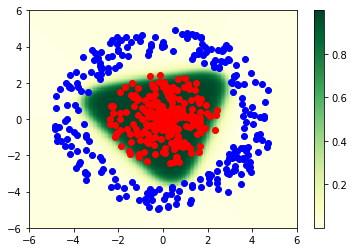

In [ ]:
def forward(x, params):    
    z1 = np.dot(x, params['w1'].T)  + params['b1']
    h = np.tanh(z1)
    z = np.dot(h, params['w'].T) + params['b']
    y = sigmoid(z)
    
    return y
num_points = 200
x1s = np.linspace(-6.0, 6.0, num_points)
x2s = np.linspace(-6.0, 6.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
Y = forward(points, params).reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(data[:num_data//2, 0], data[:num_data//2, 1], color='red') 
plt.scatter(data[num_data//2:, 0], data[num_data//2:, 1], color='blue') 

PART II

1. Now change the nonlinearity (e.g., use the logistic function), perform the above exercises, and test it out on the dataset.

In [ ]:
def backprop2(x,t,depth,rate,steps):
  parameters={}
  parameters["w1"]=np.random.randn(depth,len(x[0]))
  parameters["b1"]=np.zeros(depth)
  parameters["w"]=np.random.randn(depth)
  parameters["b"]=0
  for i in range(steps):
    z1=np.dot(x, parameters['w1'].T)  + parameters['b1']
    h=sigmoid(z1)
    z=np.dot(h, parameters['w'].T) + parameters['b']
    y=sigmoid(z)
    loss=(1/len(x)) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
    L_bar = 1
    z_bar = (1/len(x)) * (y - t)
    w_bar = np.dot(h.T, z_bar)
    b_bar = np.dot(z_bar, np.ones(len(x)))
    h_bar = np.outer(z_bar, parameters['w'].T)
    z1_bar = h_bar *h*(1-h)
    w1_bar = np.dot(z1_bar.T, x)
    b1_bar = np.dot(z1_bar.T, np.ones(len(x)))
    parameters["w1"]-=rate*w1_bar
    parameters["b1"]-=rate*b1_bar
    parameters["w"]-=rate*w_bar
    parameters["b"]-=rate*b_bar
    if i % 10 == 0:
      print("Step {:3d} | Loss {:3.2f}".format(i, loss))
  return parameters,loss

In [ ]:
params2,lossvalue2=backprop2(data,labels,6,1.4,1000)
print(params2)

Step   0 | Loss 0.91
Step  10 | Loss 0.67
Step  20 | Loss 0.63
Step  30 | Loss 0.59
Step  40 | Loss 0.53
Step  50 | Loss 0.46
Step  60 | Loss 0.40
Step  70 | Loss 0.35
Step  80 | Loss 0.31
Step  90 | Loss 0.27
Step 100 | Loss 0.24
Step 110 | Loss 0.21
Step 120 | Loss 0.19
Step 130 | Loss 0.17
Step 140 | Loss 0.16
Step 150 | Loss 0.14
Step 160 | Loss 0.13
Step 170 | Loss 0.12
Step 180 | Loss 0.12
Step 190 | Loss 0.11
Step 200 | Loss 0.10
Step 210 | Loss 0.10
Step 220 | Loss 0.09
Step 230 | Loss 0.09
Step 240 | Loss 0.09
Step 250 | Loss 0.08
Step 260 | Loss 0.08
Step 270 | Loss 0.08
Step 280 | Loss 0.07
Step 290 | Loss 0.07
Step 300 | Loss 0.07
Step 310 | Loss 0.07
Step 320 | Loss 0.06
Step 330 | Loss 0.06
Step 340 | Loss 0.06
Step 350 | Loss 0.06
Step 360 | Loss 0.06
Step 370 | Loss 0.06
Step 380 | Loss 0.06
Step 390 | Loss 0.05
Step 400 | Loss 0.05
Step 410 | Loss 0.05
Step 420 | Loss 0.05
Step 430 | Loss 0.05
Step 440 | Loss 0.05
Step 450 | Loss 0.05
Step 460 | Loss 0.05
Step 470 | Lo

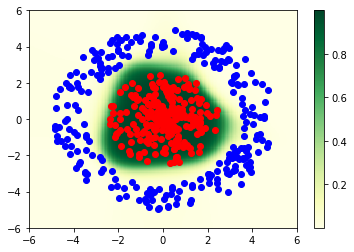

In [ ]:
def forward2(x, params):    
    z1 = np.dot(x, params['w1'].T)  + params['b1']
    h = sigmoid(z1)
    z = np.dot(h, params['w'].T) + params['b']
    y = sigmoid(z)
    
    return y
num_points = 200
x1s = np.linspace(-6.0, 6.0, num_points)
x2s = np.linspace(-6.0, 6.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
Y = forward2(points, params2).reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(data[:num_data//2, 0], data[:num_data//2, 1], color='red') 
plt.scatter(data[num_data//2:, 0], data[num_data//2:, 1], color='blue') 

2. Modify the dataset to a different kind of nonlinearly separable dataset, and test out the two classifiers.

(array([[-0.53604975,  0.701175  ],
       [ 0.48614893,  0.92845267],
       [-0.85954157,  0.54209345],
       [ 0.33185131,  0.82499785],
       [ 0.64544432,  0.70719249],
       [ 0.03143407,  0.50363255],
       [ 0.70817578, -0.48847739],
       [ 0.2163082 ,  0.86956547],
       [ 1.61036381, -0.27163403],
       [ 0.62021657, -0.38458527],
       [-1.14860296,  0.01733509],
       [ 0.77208869, -0.38080116],
       [ 1.28343019, -0.3510794 ],
       [-0.34442897,  0.95121937],
       [-0.99609354, -0.0543855 ],
       [-0.45192872,  0.84595432],
       [ 0.2164566 ,  1.07671929],
       [ 1.97840652,  0.28880544],
       [-0.9688556 ,  0.36832045],
       [ 0.07194766,  1.01433279],
       [ 0.15206595,  0.26940641],
       [-0.59682706,  0.53866536],
       [ 2.16406633,  0.49830708],
       [ 0.43852648,  0.95290094],
       [ 1.05725382, -0.5011189 ],
       [ 1.80072553,  0.36008603],
       [ 0.24091422, -0.10675891],
       [ 0.14205011, -0.1202026 ],
       [-0.03379252

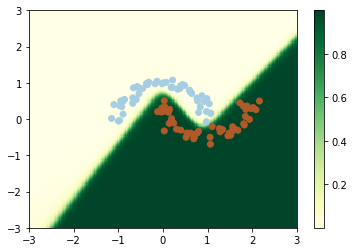

In [ ]:
import sklearn
from sklearn import datasets
sample2=datasets.make_moons(n_samples=100, noise=0.1)
print(sample2)
params3,lossvalue3=backprop(sample2[0],sample2[1],4,1,1000)
num_points = 200
x1s = np.linspace(-3.0, 3.0, num_points)
x2s = np.linspace(-3.0, 3.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
Y = forward(points, params3).reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(sample2[0][:,0],sample2[0][:,1],c=sample2[1],cmap=plt.cm.Paired)

Step   0 | Loss 0.76
Step  10 | Loss 0.41
Step  20 | Loss 0.34
Step  30 | Loss 0.31
Step  40 | Loss 0.30
Step  50 | Loss 0.29
Step  60 | Loss 0.29
Step  70 | Loss 0.28
Step  80 | Loss 0.28
Step  90 | Loss 0.28
Step 100 | Loss 0.28
Step 110 | Loss 0.28
Step 120 | Loss 0.28
Step 130 | Loss 0.28
Step 140 | Loss 0.28
Step 150 | Loss 0.27
Step 160 | Loss 0.27
Step 170 | Loss 0.27
Step 180 | Loss 0.27
Step 190 | Loss 0.27
Step 200 | Loss 0.27
Step 210 | Loss 0.27
Step 220 | Loss 0.27
Step 230 | Loss 0.27
Step 240 | Loss 0.27
Step 250 | Loss 0.27
Step 260 | Loss 0.27
Step 270 | Loss 0.27
Step 280 | Loss 0.26
Step 290 | Loss 0.26
Step 300 | Loss 0.26
Step 310 | Loss 0.26
Step 320 | Loss 0.26
Step 330 | Loss 0.25
Step 340 | Loss 0.25
Step 350 | Loss 0.25
Step 360 | Loss 0.25
Step 370 | Loss 0.24
Step 380 | Loss 0.24
Step 390 | Loss 0.24
Step 400 | Loss 0.23
Step 410 | Loss 0.23
Step 420 | Loss 0.22
Step 430 | Loss 0.22
Step 440 | Loss 0.22
Step 450 | Loss 0.21
Step 460 | Loss 0.21
Step 470 | Lo

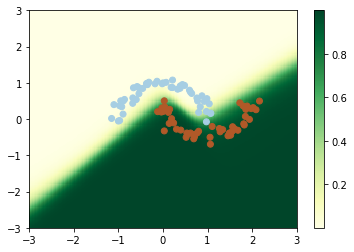

In [ ]:
params4,lossvalue4=backprop2(sample2[0],sample2[1],7,1,1000)
num_points = 200
x1s = np.linspace(-3.0, 3.0, num_points)
x2s = np.linspace(-3.0, 3.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
Y = forward2(points, params4).reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(sample2[0][:,0],sample2[0][:,1],c=sample2[1],cmap=plt.cm.Paired)

3. Apply your MLPs to the XOR dataset and confirm it learns the XOR dataset.

Step   0 | Loss 0.73
Step  10 | Loss 0.64
Step  20 | Loss 0.54
Step  30 | Loss 0.38
Step  40 | Loss 0.23
Step  50 | Loss 0.14
Step  60 | Loss 0.09
Step  70 | Loss 0.06
Step  80 | Loss 0.05
Step  90 | Loss 0.04
Step 100 | Loss 0.03
Step 110 | Loss 0.03
Step 120 | Loss 0.02
Step 130 | Loss 0.02
Step 140 | Loss 0.02
Step 150 | Loss 0.02
Step 160 | Loss 0.01
Step 170 | Loss 0.01
Step 180 | Loss 0.01
Step 190 | Loss 0.01
Step 200 | Loss 0.01
Step 210 | Loss 0.01
Step 220 | Loss 0.01
Step 230 | Loss 0.01
Step 240 | Loss 0.01
Step 250 | Loss 0.01
Step 260 | Loss 0.01
Step 270 | Loss 0.01
Step 280 | Loss 0.01
Step 290 | Loss 0.01
Step 300 | Loss 0.01
Step 310 | Loss 0.01
Step 320 | Loss 0.01
Step 330 | Loss 0.00
Step 340 | Loss 0.00
Step 350 | Loss 0.00
Step 360 | Loss 0.00
Step 370 | Loss 0.00
Step 380 | Loss 0.00
Step 390 | Loss 0.00
Step 400 | Loss 0.00
Step 410 | Loss 0.00
Step 420 | Loss 0.00
Step 430 | Loss 0.00
Step 440 | Loss 0.00
Step 450 | Loss 0.00
Step 460 | Loss 0.00
Step 470 | Lo

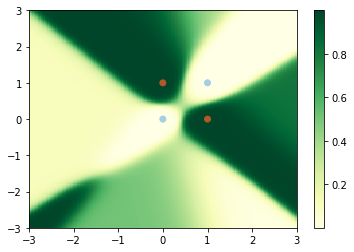

In [ ]:
XORinput=np.array([[0, 0], [0, 1],[1, 0], [1, 1]])
XORlabels=np.array([0, 1, 1, 0])
params5,lossvalue5=backprop(XORinput,XORlabels,6,1,1000)
num_points = 200
x1s = np.linspace(-3.0, 3.0, num_points)
x2s = np.linspace(-3.0, 3.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
Y = forward(points, params5).reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(XORinput[:,0],XORinput[:,1],c=XORlabels,cmap=plt.cm.Paired)

Step   0 | Loss 0.71
Step  10 | Loss 0.70
Step  20 | Loss 0.69
Step  30 | Loss 0.69
Step  40 | Loss 0.69
Step  50 | Loss 0.69
Step  60 | Loss 0.68
Step  70 | Loss 0.68
Step  80 | Loss 0.67
Step  90 | Loss 0.67
Step 100 | Loss 0.66
Step 110 | Loss 0.64
Step 120 | Loss 0.63
Step 130 | Loss 0.61
Step 140 | Loss 0.59
Step 150 | Loss 0.57
Step 160 | Loss 0.54
Step 170 | Loss 0.51
Step 180 | Loss 0.48
Step 190 | Loss 0.44
Step 200 | Loss 0.40
Step 210 | Loss 0.37
Step 220 | Loss 0.33
Step 230 | Loss 0.29
Step 240 | Loss 0.26
Step 250 | Loss 0.23
Step 260 | Loss 0.20
Step 270 | Loss 0.18
Step 280 | Loss 0.16
Step 290 | Loss 0.14
Step 300 | Loss 0.13
Step 310 | Loss 0.11
Step 320 | Loss 0.10
Step 330 | Loss 0.10
Step 340 | Loss 0.09
Step 350 | Loss 0.08
Step 360 | Loss 0.07
Step 370 | Loss 0.07
Step 380 | Loss 0.06
Step 390 | Loss 0.06
Step 400 | Loss 0.06
Step 410 | Loss 0.05
Step 420 | Loss 0.05
Step 430 | Loss 0.05
Step 440 | Loss 0.04
Step 450 | Loss 0.04
Step 460 | Loss 0.04
Step 470 | Lo

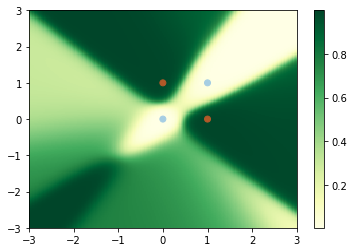

In [ ]:
params6,lossvalue6=backprop2(XORinput,XORlabels,6,1,1000)
num_points = 200
x1s = np.linspace(-3.0, 3.0, num_points)
x2s = np.linspace(-3.0, 3.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
Y = forward2(points, params6).reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(XORinput[:,0],XORinput[:,1],c=XORlabels,cmap=plt.cm.Paired)

PART III

1. What is the difference between classification and regression? Make sure you refer to the dataset and the types of data therein.

Regression: a statistic model to estimate the relationship between a dependent variable and one or more independent variables. Therefore, in ML, regression is about predicting a quantity. The target dataset for a regression problem is consisted of real quantity values corresponding to each samples(𝑡 𝜖 𝑹).
classification: a statistic problem to separate data samples into two or more categories. In ML, classification is about predicting a label. The target dataset for a classification problem is consisted of labels for each samples(𝑡 𝜖 𝒁).

3. Code your MLP.

In [ ]:
def dlrelu(x):
  dx = np.ones_like(x)
  dx[x < 0] = 0.1
  return dx
def MLPregression(x,t,depth,rate,steps):
  parameters={}
  parameters["w1"]=np.random.randn(depth,len(x[0]))
  parameters["b1"]=np.zeros(depth)
  parameters["w"]=np.random.randn(depth)
  parameters["b"]=0
  for i in range(steps):
    z1=np.dot(x, parameters['w1'].T)  + parameters['b1']
    """h=np.random.randn(len(x),depth)
    for k in range(depth):
      h[:,k]=np.power(z1[:,k], k+1)"""
    h=np.where(z1 > 0, z1, z1 * 0.1) 
    z=np.dot(h, parameters['w'].T) + parameters['b']
    y=z
    loss=(1/len(x)) * np.sum(0.5*(y-t)*(y-t))
    L_bar = 1
    z_bar = (1/len(x)) * (y - t)
    w_bar = np.dot(h.T, z_bar)
    b_bar = np.dot(z_bar, np.ones(len(x)))
    h_bar = np.outer(z_bar, parameters['w'].T)
    """z1_bar=np.random.randn(len(x),depth)
    for v in range(depth):
      z1_bar[:,v] = h_bar[:,v]*(v+1)*np.power(z1[:,v], v)"""
    z1_bar = dlrelu(z1)*h_bar
    w1_bar = np.dot(z1_bar.T, x)
    b1_bar = np.dot(z1_bar.T, np.ones(len(x)))
    parameters["w1"]-=rate*w1_bar
    parameters["b1"]-=rate*b1_bar
    parameters["w"]-=rate*w_bar
    parameters["b"]-=rate*b_bar
    if i % 100 == 0:
      print("Step {:3d} | Loss {:3.2f}".format(i, loss),w1_bar)
  return parameters,loss

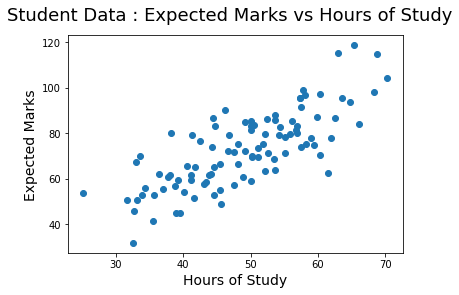

Step   0 | Loss 93.00 [[-212.72592493]]
Step 100 | Loss 56.33 [[0.00071447]]
Step 200 | Loss 56.33 [[0.00081821]]
Step 300 | Loss 56.33 [[0.00092166]]
Step 400 | Loss 56.33 [[0.00102494]]
Step 500 | Loss 56.33 [[0.00112805]]
Step 600 | Loss 56.33 [[0.00123099]]
Step 700 | Loss 56.33 [[0.00133376]]
Step 800 | Loss 56.32 [[0.00143636]]
Step 900 | Loss 56.32 [[0.00153879]]
Step 1000 | Loss 56.32 [[0.00164106]]
Step 1100 | Loss 56.32 [[0.00174315]]
Step 1200 | Loss 56.32 [[0.00184508]]
Step 1300 | Loss 56.32 [[0.00194685]]
Step 1400 | Loss 56.32 [[0.00204845]]
Step 1500 | Loss 56.32 [[0.00214988]]
Step 1600 | Loss 56.31 [[0.00225115]]
Step 1700 | Loss 56.31 [[0.00235225]]
Step 1800 | Loss 56.31 [[0.00245319]]
Step 1900 | Loss 56.31 [[0.00255397]]
Step 2000 | Loss 56.31 [[0.00265458]]
Step 2100 | Loss 56.31 [[0.00275504]]
Step 2200 | Loss 56.31 [[0.00285532]]
Step 2300 | Loss 56.31 [[0.00295545]]
Step 2400 | Loss 56.31 [[0.00305542]]
Step 2500 | Loss 56.30 [[0.00315523]]
Step 2600 | Loss 56

In [ ]:
data1 = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')
data1.shape
X=data1[:,0]
X1=X.reshape(100,1)
Y=data1[:,1]
fig = plt.figure()
plt.scatter(X, Y)
fig.suptitle('Student Data : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()
params7,lossvalue7=MLPregression(X1,Y,1,0.0001,20000)
print(params7)

[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74] [ 37.37127214  38.83594865  40.30062516  41.76530167  43.22997819
  44.6946547   46.15933121  47.62400772  49.08868423  50.55336075
  52.01803726  53.48271377  54.94739028  56.4120668   57.87674331
  59.34141982  60.80609633  62.27077284  63.73544936  65.20012587
  66.66480238  68.12947889  69.59415541  71.05883192  72.52350843
  73.98818494  75.45286145  76.91753797  78.38221448  79.84689099
  81.3115675   82.77624402  84.24092053  85.70559704  87.17027355
  88.63495006  90.09962658  91.56430309  93.0289796   94.49365611
  95.95833262  97.42300914  98.88768565 100.35236216 101.81703867
 103.28171519 104.7463917  106.21106821 107.67574472 109.14042123]


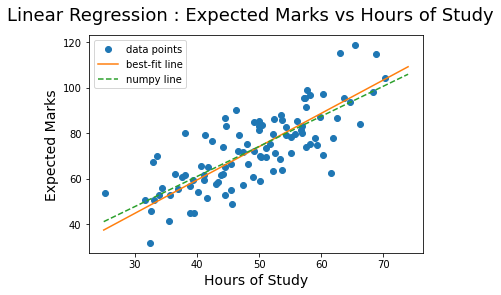

In [ ]:
def forward3(x, params,depth):    
    z1 = np.dot(x, params['w1'].T)  + params['b1']
    """h=np.random.randn(len(x),depth)
    for k in range(depth):
      h[:,k]=np.power(z1[:,k], k+1)"""
    h = np.where(z1 > 0, z1, z1 * 0.1)
    z = np.dot(h, params['w'].T) + params['b']
    y = z
    
    return y
np_m, np_b = np.polyfit(X, Y, 1)
fig = plt.figure()

# Generate data for plotting Line
x1 = np.arange(25, 75)
y1 = forward3(x1.reshape(50,1),params7,1)
print(x1,y1)

# Generate data for plotting Line Numpy Linear Regression
np_x = np.arange(25, 75)
np_y = [np_m * x_i + np_b for x_i in np_x]

# plot data and best-fit lines
plt.plot(X, Y, 'o', x1, y1, '-', np_x, np_y, '--')
plt.legend(loc='upper left', labels=['data points', 'best-fit line', 'numpy line'])

fig.suptitle('Linear Regression : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()

Step   0 | Loss 40199.13 [[-2029.26749776]
 [  769.83283665]
 [-1953.19313055]
 [  406.57450225]
 [  774.73118981]
 [-2759.58092352]
 [  847.54621107]
 [-2323.51441955]]
Step 100 | Loss 2426.96 [[-2.27280073e+00]
 [ 2.57149842e+00]
 [ 4.41904952e-01]
 [ 2.15976130e-03]
 [ 3.61139872e-03]
 [ 1.07344593e-02]
 [ 1.07110552e-01]
 [-2.15551489e+00]]
Step 200 | Loss 2382.10 [[-0.93102267]
 [ 0.05325956]
 [ 0.00920314]
 [ 0.00596369]
 [ 0.00997228]
 [ 0.02964221]
 [ 0.04331955]
 [-0.88268017]]
Step 300 | Loss 2337.80 [[ 0.36140463]
 [-2.36297749]
 [-0.41036089]
 [ 0.00949622]
 [ 0.01587962]
 [ 0.04720278]
 [-0.01666641]
 [ 0.34255844]]
Step 400 | Loss 2293.81 [[ 1.5806444 ]
 [-4.65884959]
 [-0.81271102]
 [ 0.01278501]
 [ 0.02137962]
 [ 0.06355337]
 [-0.07250899]
 [ 1.49801055]]
Step 500 | Loss 2249.77 [[ 2.72598097]
 [-6.83259964]
 [-1.19671246]
 [ 0.01579349]
 [ 0.0264111 ]
 [ 0.07851202]
 [-0.12480316]
 [ 2.58333945]]
Step 600 | Loss 2205.40 [[ 3.794947  ]
 [-8.87672399]
 [-1.56031269]
 [ 0

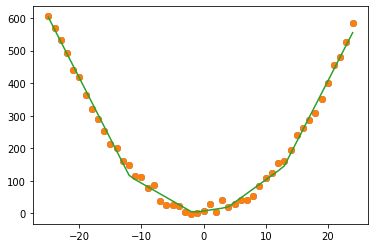

In [ ]:
# Generate polynomial data set
poly_x=np.arange(-25,25)
poly_y=np.random.randn(50)*10+poly_x**2
plt.plot(poly_x,poly_y,"o")
# polynomial regression
params8,lossvalue8=MLPregression(poly_x.reshape(50,1),poly_y,8,0.0000517,60000)
poly_yregression=forward3(poly_x.reshape(50,1),params8,2)
plt.plot(poly_x,poly_y,"o",poly_x,poly_yregression,"-")